## Analysis on Supermarket

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter 

In [2]:
supermarket = pd.read_csv("supermarket.csv")
supermarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [3]:
# let's drop some columns that aren't too useful
supermarket = supermarket.drop(columns=['gross margin percentage', 'gross income', 'cogs'])
print(supermarket.head())

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment  Rating  
0  13:08      Ewallet     9.1  
1  10:29         Cash     9.6  
2  13:23  Credit card     7.4  
3  20:33      Ewallet     8.4  
4  1

In [4]:
supermarket.isnull().sum()

Invoice ID       0
Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Tax 5%           0
Total            0
Date             0
Time             0
Payment          0
Rating           0
dtype: int64

There isn't any null value in the dataframe, but just in case we need to clean some data later, let's create some functions to clean numerical data.

##### Data Cleansing Functions

In [5]:
def is_col_numeric(table, col):
    '''
    If there is an item in a column that is not numerical return False, otherwise return True
    (DataFrame, column) -> bool
    '''
    not_numeric =[]
    for num in table[col]:
        if type(num) != int and type(num) != float:
            bad_syntax.append(num)
    return len(not_numeric) == 0

def cleanse_price(table, col):
    '''
    cleanse data in price column of a dataframe
    (Dataframe) -> Dataframe
    '''
    if is_col_numeric(table, col):
        for ind, num in enumerate(table[col]):
            table.at[ind, col] = round(num, 2)
        return table
    else:
        return "there is an item that's not numerical in the price column"

print(cleanse_price(supermarket, 'Total').head())

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%   Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.97   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.22   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.53   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.05  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.38   2/8/2019   

    Time      Payment  Rating  
0  13:08      Ewallet     9.1  
1  10:29         Cash     9.6  
2  13:23  Credit card     7.4  
3  20:33      Ewallet     8.4  
4  10:37      Ew

### Find the gender ratio

In [6]:
supermarket.groupby('Gender')['Invoice ID'].count()

Gender
Female    501
Male      499
Name: Invoice ID, dtype: int64

### Total product sales based on gender

In [7]:
product_gender_sum = supermarket.groupby(['Product line', 'Gender'], as_index= False)[['Quantity', 'Total']].sum()
product_gender_ratio = supermarket.groupby(['Product line', 'Gender'], as_index= False)['Invoice ID'].count()
product_gender_merge = product_gender_ratio.merge(product_gender_sum, on=['Product line', 'Gender'])
print(product_gender_merge)

              Product line  Gender  Invoice ID  Quantity     Total
0   Electronic accessories  Female          84       488  27102.03
1   Electronic accessories    Male          86       483  27235.47
2      Fashion accessories  Female          96       530  30437.39
3      Fashion accessories    Male          82       372  23868.53
4       Food and beverages  Female          90       514  33170.92
5       Food and beverages    Male          84       438  22973.99
6        Health and beauty  Female          64       343  18560.99
7        Health and beauty    Male          88       511  30632.76
8       Home and lifestyle  Female          79       498  30036.88
9       Home and lifestyle    Male          81       413  23825.02
10       Sports and travel  Female          88       496  28574.74
11       Sports and travel    Male          78       424  26548.12


To be clear, 
* Invoice ID shows the number of male vs female.
* Quantitiy shows the amount of products bought by each gender.
* Total is the sum of dollars spent.

What this table shows:
* Consumption tendency of each gender in various categories.
* Marketing strategy

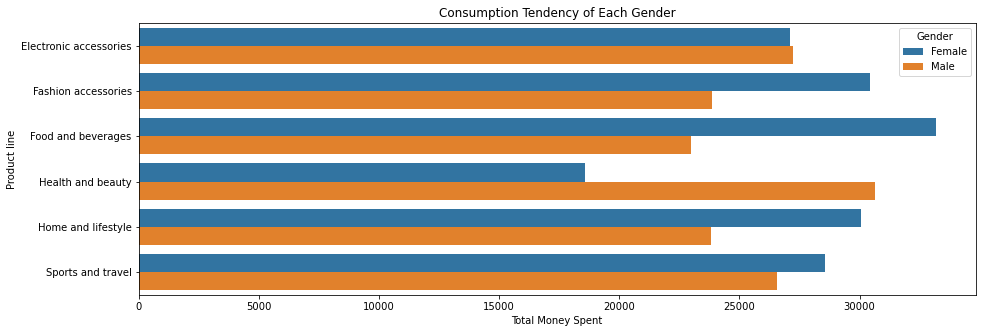

In [8]:
plt.figure(figsize =(15, 5))
product_line_tendency = sns.barplot(y = 'Product line', x = 'Total', hue = 'Gender', data=product_gender_merge)
product_line_tendency.set_title(label='Consumption Tendency of Each Gender')
product_line_tendency.set_xlabel(xlabel= 'Total Money Spent')
plt.show()

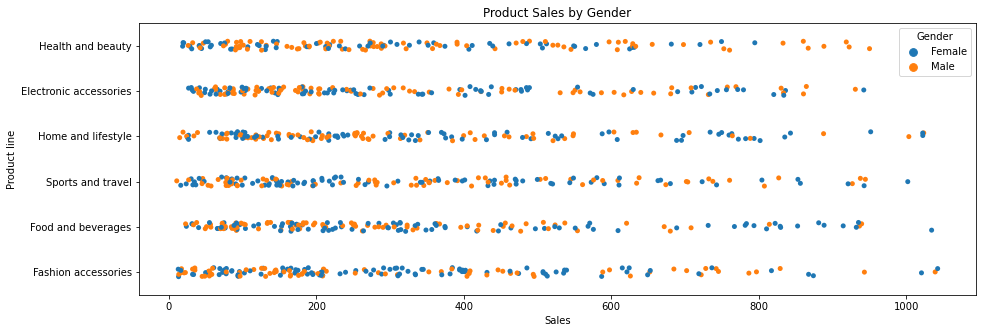

In [9]:
plt.figure(figsize =(15, 5))
product_line_tendency = sns.stripplot(y = 'Product line', x = 'Total', hue = 'Gender', data=supermarket)
product_line_tendency.set_title(label='Product Sales by Gender')
product_line_tendency.set_xlabel(xlabel= 'Sales')
plt.show()

##### Analysis 1: target marketing

Women tend to consume more goods in fashion, home & lifestyle, and food while men consume more on health and beauty products.

If age and race were both in data, we would've been able to provide more detailed insights, but the graphs alone are still informative.

The most probable reason females spend more on home & lifestyle and groceries is because they're usually in charge of housework. Thus, target marketing goods in those product lines to women in age of 30-50 would most likely result in higher sales than marketing to the general public.

Likewise, target marketing health & beauty products such as protein and gainers to men in age of 18-35 would yield the best sales result.

### Are members more satisfied with the shopping experience?

In [10]:
supermarket.groupby('Customer type', as_index=False)['Rating'].mean()

,Customer type,Rating
0,Member,6.940319
1,Normal,7.005210


##### Analysis 2: There's no correlation between membership and satisfaction


### Time and Consumption

In [11]:
# get hours only from the Time column
supermarket['Hour'] = pd.to_datetime(supermarket['Time']).dt.hour

In [12]:
hour_avg = supermarket.groupby('Hour', as_index=False)[['Quantity', 'Total']].mean()
print(hour_avg)

    Hour  Quantity       Total
0     10  5.198020  311.104059
1     11  5.700000  337.526333
2     12  5.629213  292.875169
3     13  5.679612  337.119029
4     14  5.963855  371.426386
5     15  5.196078  305.681275
6     16  5.454545  327.614156
7     17  5.608108  330.340946
8     18  5.107527  279.895806
9     19  5.743363  351.323451
10    20  5.360000  306.260667


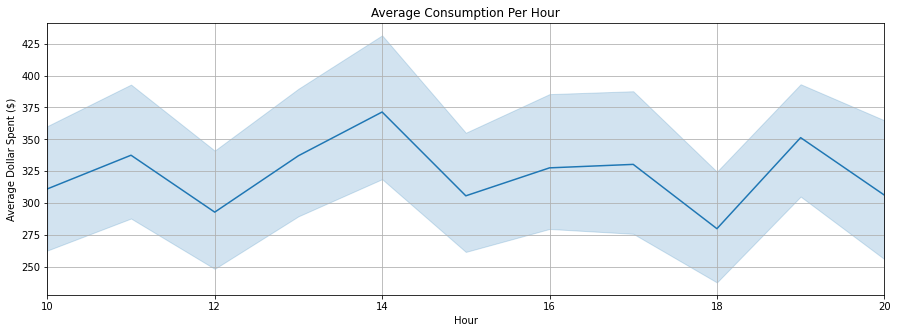

In [13]:
plt.figure(figsize =(15, 5))
hourly_consumption = sns.lineplot(x='Hour', y='Total', data=supermarket)
plt.xlim(10, 20)
hourly_consumption.set_ylabel(ylabel='Average Dollar Spent ($)')
plt.title('Average Consumption Per Hour')
plt.grid()
plt.show()

##### Analysis 3: busy and relaxed hours
By average, the supermarket's busiest hour is around 14:00 AM or 2:00 PM.
* Average quantitiy of goods sold: __5.963855__ 
* Average dollar spent: __371.426386__

By average, the supermarket's most relaxed hour is around 18:00 AM or 6:00 PM.
* Average quantitiy of goods sold: __5.107527__ 
* Average dollar spent: __279.895806__

### Customer satisfaction of each branch

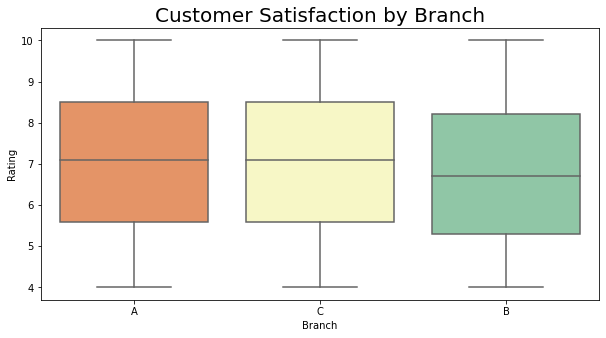

In [14]:
plt.figure(figsize=(10,5)) 
branch_rating = sns.boxplot(x="Branch", y = "Rating" ,data =supermarket, palette= "Spectral", dodge=False)
branch_rating.set_title("Customer Satisfaction by Branch", fontsize = 20)
branch_rating.set_xlabel(xlabel = "Branch", fontsize = 10)
branch_rating.set_ylabel(ylabel = "Rating", fontsize = 10)
plt.show()

##### Analysis 4: customer satisfaction by branch
Customers from branches A and C share almost the same level of customer satisfaction, but B is not.

Averages in A and C are higher than 7 and range from approximately 5.6 to 8.5

Average in B is below 7 and ranges from approximately 5.4 to 8.2

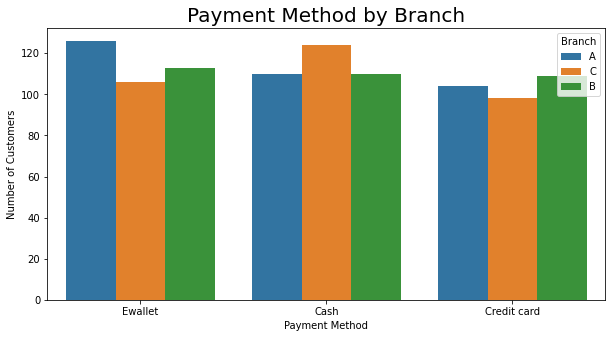

In [15]:
plt.figure(figsize=(10,5)) 
payment_branch = sns.countplot(x='Payment', hue='Branch', data=supermarket)
payment_branch.set_title(label = "Payment Method by Branch", fontsize= 20)
payment_branch.set_xlabel(xlabel = "Payment Method", fontsize = 10)
payment_branch.set_ylabel(ylabel = "Number of Customers", fontsize = 10)
plt.show()

### The best performing product line

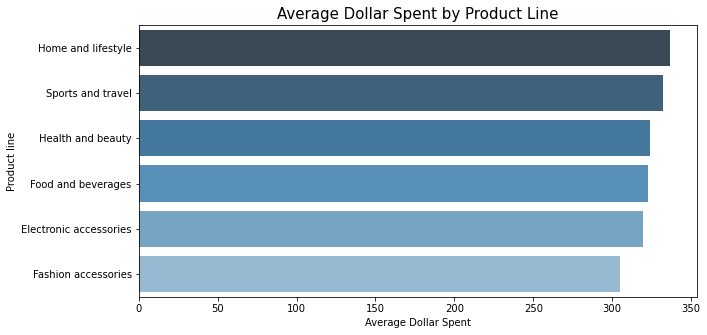

In [16]:
plt.figure(figsize=(10,5))
product_line_sum = supermarket.groupby(['Product line'], as_index= False)[['Total', 'Rating']].mean()
by_avg_dollar = product_line_sum.sort_values(by='Total', ascending=False)
by_avg_rating = product_line_sum.sort_values(by='Rating', ascending=False)
product_avg_dollar = sns.barplot(y='Product line', x='Total', data=by_avg_dollar, palette="Blues_d")
product_avg_dollar.set_xlabel(xlabel='Average Dollar Spent', fontsize = 10)
product_avg_dollar.set_title('Average Dollar Spent by Product Line', fontsize = 15)
plt.show()

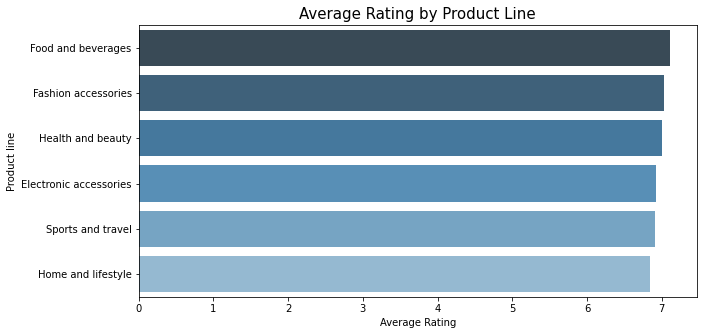

In [18]:
plt.figure(figsize=(10,5))
product_rating = sns.barplot(y='Product line', x='Rating', data=by_avg_rating, palette="Blues_d")
product_rating.set_xlabel(xlabel='Average Rating', fontsize = 10)
product_rating.set_title('Average Rating by Product Line', fontsize = 15)
plt.show()